<a href="https://colab.research.google.com/github/Juancarlos56/Repositorio-Simulacion-10/blob/main/TareasEnClases/Tarea2_MatplotPlotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <span style="color:BLUE">Activar cuenta de Google Drive</span>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  <span style="color:BLUE">Ubicarse dentro de la carpeta</span>

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/TrabajosSimulacion/Tarea2_MatplotPlotly
!ls

/content/drive/My Drive/Colab Notebooks/TrabajosSimulacion/Tarea2_MatplotPlotly
fifa_datos.csv	Tarea2_MatplotPlotly.ipynb


### Importar las librerias necesarias

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go

## Carga de Dataset desde Drive

In [41]:
import pandas as pd
fifa = pd.read_csv('fifa_datos.csv', low_memory=False, encoding= 'unicode_escape', sep=',')
fifa = fifa.drop(['ï»¿'], axis=1)
print(fifa.shape)
fifa.head(5)

(18207, 88)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M


## Ejercicio en Clase

Utilizar Matplot y Plotly para realizar las graficas.

### 1. Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

* Debajo 125 Lbs.
* 125-150
* 150-175
* 175 o superior



In [ ]:
columns_names = fifa.columns.values
print(columns_names)

['ID' 'Name' 'Age' 'Photo' 'Nationality' 'Flag' 'Overall' 'Potential'
 'Club' 'Club Logo' 'Value' 'Wage' 'Special' 'Preferred Foot'
 'International Reputation' 'Weak Foot' 'Skill Moves' 'Work Rate'
 'Body Type' 'Real Face' 'Position' 'Jersey Number' 'Joined' 'Loaned From'
 'Contract Valid Until' 'Height' 'Weight' 'LS' 'ST' 'RS' 'LW' 'LF' 'CF'
 'RF' 'RW' 'LAM' 'CAM' 'RAM' 'LM' 'LCM' 'CM' 'RCM' 'RM' 'LWB' 'LDM' 'CDM'
 'RDM' 'RWB' 'LB' 'LCB' 'CB' 'RCB' 'RB' 'Crossing' 'Finishing'
 'HeadingAccuracy' 'ShortPassing' 'Volleys' 'Dribbling' 'Curve'
 'FKAccuracy' 'LongPassing' 'BallControl' 'Acceleration' 'SprintSpeed'
 'Agility' 'Reactions' 'Balance' 'ShotPower' 'Jumping' 'Stamina'
 'Strength' 'LongShots' 'Aggression' 'Interceptions' 'Positioning'
 'Vision' 'Penalties' 'Composure' 'Marking' 'StandingTackle'
 'SlidingTackle' 'GKDiving' 'GKHandling' 'GKKicking' 'GKPositioning'
 'GKReflexes' 'Release Clause']


In [42]:
print(fifa["Weight"].dtypes, "\n")
fifa['Weight'] = fifa['Weight'].str.split('lbs', expand=True)[0]
fifa["Weight"] = pd.to_numeric(fifa["Weight"])
fifa['Weight'].head(5)

object 



0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

### Ordenamiento de Jugadores por peso

In [54]:
# inplace=True para ordener en el mismo dataset
fifa.sort_values('Weight', inplace=True)
fifa.head(5)
#fifa_sort_by_Weight = fifa.sort_values('Weight')
#fifa_sort_by_Weight.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13338,235600,B. Al Mutairi,28,https://cdn.sofifa.org/players/4/19/235600.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,62,62,Al Batin,https://cdn.sofifa.org/teams/2/light/112990.png,...,42.0,58.0,61.0,56.0,7.0,6.0,13.0,8.0,9.0,â¬396K
17157,242566,K. Yamaguchi,23,https://cdn.sofifa.org/players/4/19/242566.png,Japan,https://cdn.sofifa.org/flags/163.png,55,61,Shonan Bellmare,https://cdn.sofifa.org/teams/2/light/113161.png,...,56.0,21.0,21.0,13.0,14.0,5.0,15.0,9.0,14.0,â¬174K
4390,214919,D. Rojas,23,https://cdn.sofifa.org/players/4/19/214919.png,Chile,https://cdn.sofifa.org/flags/55.png,71,76,Universidad CatÃ³lica,https://cdn.sofifa.org/teams/2/light/110975.png,...,58.0,31.0,35.0,20.0,13.0,12.0,16.0,11.0,7.0,â¬4.7M
7126,225150,A. Araujo,21,https://cdn.sofifa.org/players/4/19/225150.png,Portugal,https://cdn.sofifa.org/flags/38.png,68,75,GFC Ajaccio,https://cdn.sofifa.org/teams/2/light/110316.png,...,60.0,24.0,20.0,15.0,10.0,10.0,15.0,15.0,7.0,â¬2.5M
15585,227726,I. Al Talhi,23,https://cdn.sofifa.org/players/4/19/227726.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,59,64,Al Fateh,https://cdn.sofifa.org/teams/2/light/112390.png,...,50.0,29.0,49.0,45.0,15.0,15.0,6.0,11.0,14.0,â¬362K


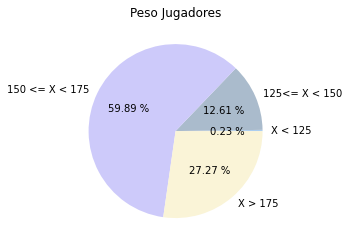

In [56]:
# Generar un grafico de acuerdo con el peso

menor125 = fifa.loc[fifa['Weight'] < 125].count()[0]
de125hasta150 = fifa.loc[(fifa['Weight'] >= 125) & (fifa['Weight'] < 150)].count()[0]
de150hasta175 = fifa.loc[(fifa['Weight'] >= 150) & (fifa['Weight'] < 175)].count()[0]
mayor175 = fifa.loc[fifa['Weight'] >= 175].count()[0]
plt.figure()


etiquetas = ['X < 125', '125<= X < 150','150 <= X < 175', 'X > 175']
colores = ['#abcdef', '#aabbcc', '#CDCAFA', '#FAF4D7']
plt.pie([menor125, de125hasta150, de150hasta175, mayor175], labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Peso Jugadores')
plt.show()

### 2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90



In [62]:
fifa['Overall'].shape

(18207,)

Valores de cada columna respectivamente
 40-49: 89, 50-59: 2815, 60-69: 9665, 70-79: 5083, 80-89: 541, 90-100: 14




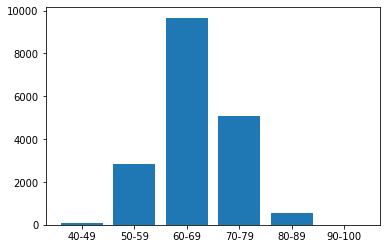

In [65]:
#Grafico de Barras
etiquetas = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

valores40 = fifa.loc[(fifa['Overall'] >= 40) & (fifa['Overall'] <= 49)].count()[0]
valores50 = fifa.loc[(fifa['Overall'] >= 50) & (fifa['Overall'] <= 59)].count()[0]
valores60 = fifa.loc[(fifa['Overall'] >= 60) & (fifa['Overall'] <= 69)].count()[0]
valores70 = fifa.loc[(fifa['Overall'] >= 70) & (fifa['Overall'] <= 79)].count()[0]
valores80 = fifa.loc[(fifa['Overall'] >= 80) & (fifa['Overall'] <= 89)].count()[0]
valores90 = fifa.loc[(fifa['Overall'] >= 90) & (fifa['Overall'] <= 100)].count()[0]

valores = [valores40, valores50, valores60, valores70, valores80, valores90]
print("Valores de cada columna respectivamente")
print(f" 40-49: {valores[0]}, 50-59: {valores[1]}, 60-69: {valores[2]}, 70-79: {valores[3]}, 80-89: {valores[4]}, 90-100: {valores[5]}")
print("\n")
plt.figure()
barras = plt.bar(etiquetas, valores)



### 3 Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.


### Plotly Dash

Dash es el marco original de código bajo para crear rápidamente aplicaciones de datos en Python, R, Julia y F# (experimental).

Las aplicaciones de Dash se representan en el navegador web. Puede implementar sus aplicaciones en VM o clústeres de Kubernetes y luego compartirlas a través de direcciones URL. Dado que las aplicaciones de Dash se ven en el navegador web, Dash es inherentemente multiplataforma y está listo para dispositivos móviles.

Dash es una biblioteca de código abierto publicada bajo la licencia permisiva del MIT

Plotly es mejor conocido por su hermosa biblioteca de gráficos JavaScript de código abierto que construye el núcleo de Chart Studio, una plataforma para diseñar gráficos en colaboración (no se requiere codificación).

Sin embargo, para crear un informe, estamos utilizando su producto más reciente, Plotly Dash, un marco de código abierto que permite la creación de paneles web interactivos solo con Python (sin necesidad de escribir código JavaScript). Plotly Dash también está disponible como plan Enterprise.



In [67]:
!pip install dash
!pip install jupyter-dash
!pip install pandas

     |████████████████████████████████| 9.6 MB 5.0 MB/s 
     |████████████████████████████████| 357 kB 48.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=b37d37c13a909fed712e35b102d0152bf5876c50791cc642d6f1ff5de2362416
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [72]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.

from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(host="0.0.0.0",port=1005)
    #app.run_server(debug=True)

Dash is running on http://0.0.0.0:1005/

Dash is running on http://0.0.0.0:1005/

Dash is running on http://0.0.0.0:1005/

Dash is running on http://0.0.0.0:1005/

Dash is running on http://0.0.0.0:1005/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off



1.   https://www.linuxtut.com/en/66548cf39bfebbd78788/
2.   https://dash.plotly.com/
3. https://foroayuda.es/inicie-una-aplicacion-dash-en-un-cuaderno-de-google-colab/
4. https://www.youtube.com/watch?v=FxEY1NOyhYQ


### Datapane (open-source library)

Open-source library Datapane le permite crear informes a partir de componentes, como un componente de tabla, un componente de gráfico, etc. Estos componentes son compatibles con objetos de Python como pandas DataFrames y muchas bibliotecas. 

Datapane es un marco para informes que le permite generar informes interactivos a partir de pandas DataFrames, visualizaciones de Python (como Bokeh y Altair) y Markdown. A diferencia de soluciones como Dash, Datapane le permite generar informes independientes que no requieren un servidor Python en ejecución, pero tampoco requiere ningún código HTML.

Con Datapane, puede generar informes únicos o implementar su secuencia de comandos de Jupyter Notebook o Python para que otros puedan generar informes dinámicamente ingresando parámetros a través de una aplicación web generada automáticamente.

#### Tutorail de implementacion de Datapane para generacion de reporte en Python utilizando Google Codelabs



*   https://colab.research.google.com/drive/1bS2TUIgVGIU4zLAa9KNFwfqfeHCnXzLN



In [ ]:
import datapane as dp
import pandas as pd
import altair as alt

df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/GOOG?period2=1585222905&interval=1mo&events=history')

chart = alt.Chart(df).encode(
    x='Date:T',
    y='Open'
).mark_line().interactive()

r = dp.Report(dp.Table(df), dp.Plot(chart))
r.save(path='report.html')

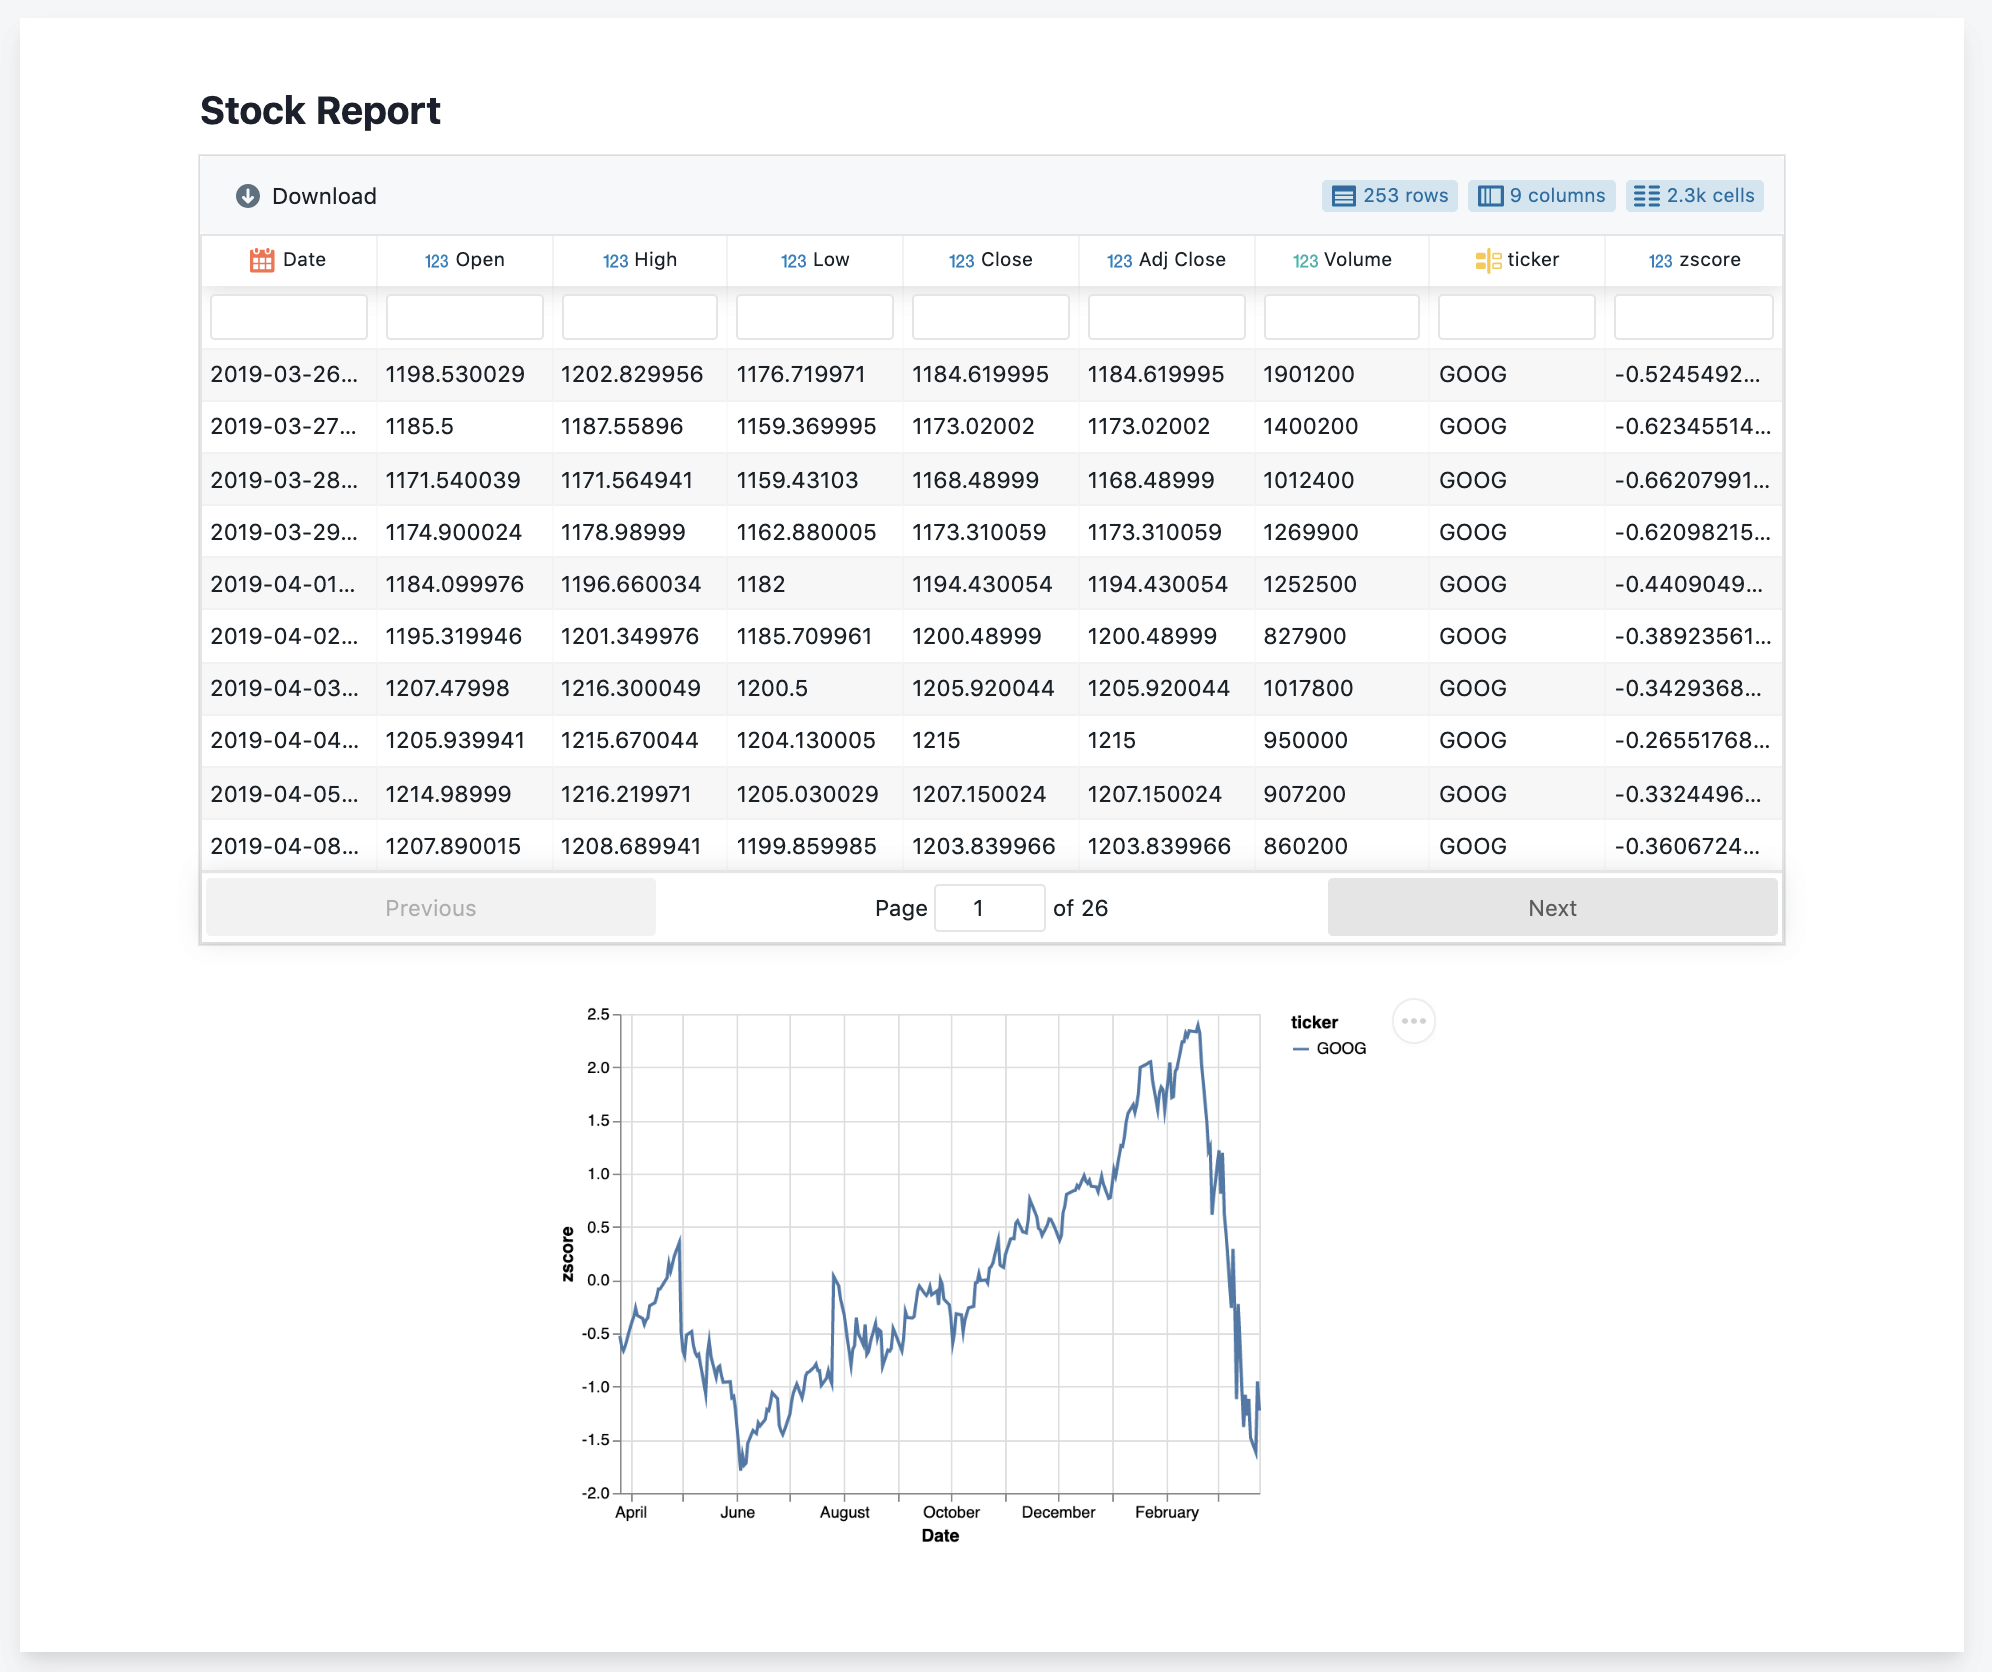

### Referencias: 
https://blog.datapane.com/datapane-interactive-colab-guides-github-and-linkedin-skills-3989d3c10f11
https://www.xlwings.org/blog/reporting-with-python
https://towardsdatascience.com/introduction-to-datapane-a-python-library-to-build-interactive-reports-4593fd3cb9c8
https://datapane.com/
https://analyticsindiamag.com/hands-on-guide-to-datapane-python-tool-for-reporting-and-visualization/
https://github.com/datapane/datapane
